# Clustering Techniques in Machine Learning
Clustering is an unsupervised learning technique used to group similar data points together. Different clustering methods use various strategies to form these groups or "clusters." Today, we’ll explore the following clustering algorithms:

Centroid-based: K-Means
Distribution-based: Gaussian Mixture Models (GMM)
Density-based: DBSCAN


Dataset
We will use the Breast Cancer Wisconsin dataset from sklearn.datasets. This dataset contains features computed from digitized images of breast cancer biopsies. The goal is to apply clustering algorithms to group the data and analyze the clusters.


## K-Means Clustering
K-Means clustering aims to partition data into 'k' clusters. The algorithm follows these steps:
1. Randomly initialize `k` cluster centers.
2. Assign each point to the nearest cluster center.
3. Recalculate the cluster means.
4. Repeat until the cluster assignments do not change.

### Limitations:
- Sensitive to the initial choice of centroids.
- Assumes spherical clusters of equal sizes.
- Sensitive to outliers.


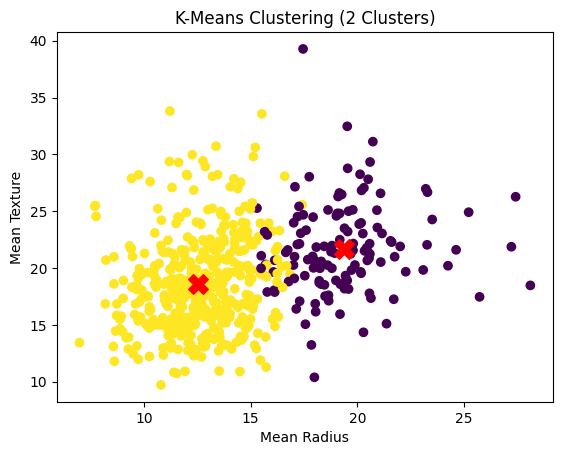

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

#dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)

#fitting kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
"""During the fitting process, the K-Means algorithm partitions the data points into
the specified number of clusters (in this case, 2 clusters) by minimizing the within-cluster sum of squares
(i.e., the variance within each cluster)."""

#visclusters using the first two features
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering (2 Clusters)")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.show()


## Gaussian Mixture Models (GMM)
GMM assumes that the data is generated from a mixture of several Gaussian distributions. It is a probabilistic clustering technique that assigns probabilities to each point for belonging to different clusters.


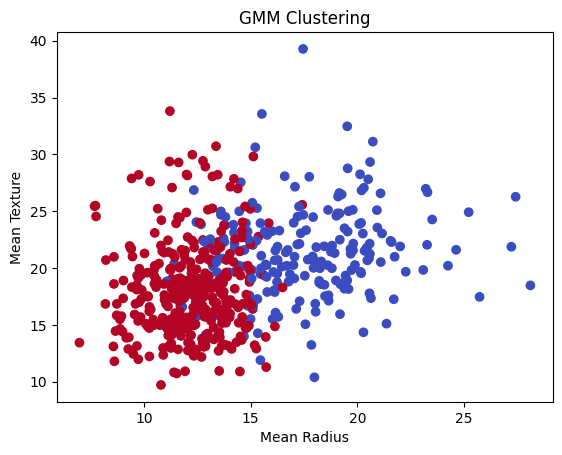

'K-Means assumes that clusters are spherical and equally sized. It assigns data points to the nearest cluster based on distance.\nGMM allows clusters to take on more general shapes (elliptical) and assigns points based on a probabilistic model.\nEach point is assigned to a cluster based on the likelihood that it was generated by that cluster’s Gaussian distribution.\nGMM can capture more complex cluster structures because of its flexibility in the shape and orientation of clusters, while K-Means is more rigid.'

In [ ]:
from sklearn.mixture import GaussianMixture
#cse20,csa007,ai030,d24csa002
"""A Gaussian Mixture Model is a probabilistic model that assumes that all data points are generated from a
mixture of several Gaussian distributions, each with its own mean and variance.
It’s more flexible than K-Means because it accounts for the shape, size, and orientation of clusters."""

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X) #This involves estimating the parameters (means, covariances, and mixture weights) of the Gaussian distributions that best describe the data.
gmm_labels = gmm.predict(X)
"""After fitting the model, this line assigns each data point in X to the cluster that maximizes its likelihood under the learned mixture model.
The predicted cluster labels are stored in gmm_labels."""

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("GMM Clustering")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.show()

"""K-Means assumes that clusters are spherical and equally sized. It assigns data points to the nearest cluster based on distance.
GMM allows clusters to take on more general shapes (elliptical) and assigns points based on a probabilistic model.
Each point is assigned to a cluster based on the likelihood that it was generated by that cluster’s Gaussian distribution.
GMM can capture more complex cluster structures because of its flexibility in the shape and orientation of clusters, while K-Means is more rigid."""

## DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are close to each other based on density. It can find clusters of arbitrary shapes and does not require specifying the number of clusters in advance.


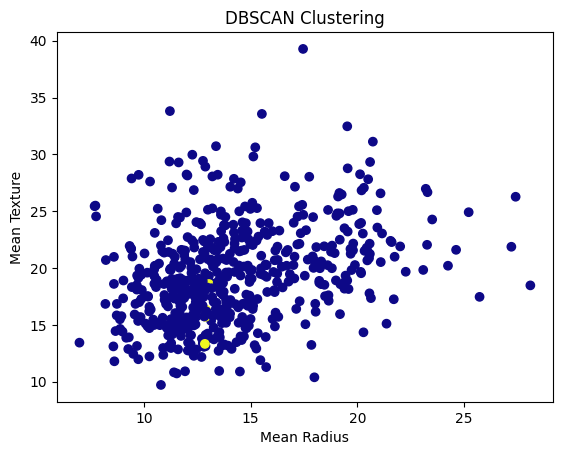

'DBSCAN does not require you to specify the number of clusters in advance, unlike K-Means and GMM.\n It finds clusters based on the density of points in the dataset.'

In [ ]:
from sklearn.cluster import DBSCAN
#m24mse002
# Apply DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X)
"""eps- The maximum distance between two points for them to be considered as neighbors.
Points within this distance from each other are considered part of the same cluster.

The minimum number of points required in a neighborhood (including the point itself) for a point to be considered a "core point" of a cluster.
If a point has fewer neighbors than min_samples, it is considered noise or an edge point."""

# Plot results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.show()
"""DBSCAN does not require you to specify the number of clusters in advance, unlike K-Means and GMM.
 It finds clusters based on the density of points in the dataset."""

* Core Points: Points that have at least min_samples points within a distance of eps. These form the dense parts of clusters.
* Border Points: Points that are within eps of a core point but do not have enough neighbors to be core points themselves.
* Noise Points: Points that do not belong to any cluster, i.e., they are farther away from core points or border points than eps.

##Advantages of DBSCAN:
* No need to specify the number of clusters: It automatically determines the number of clusters based on density.
* Handles noise: Points that do not belong to any cluster (outliers) are labeled as noise.
* Non-spherical clusters: Unlike K-Means, DBSCAN can find arbitrarily shaped clusters (elliptical, elongated, etc.).

##Disadvantages:
Sensitive to eps and min_samples: Choosing the right values for these parameters can be challenging. Too small an eps may label points as noise, while too large an eps may merge distinct clusters.

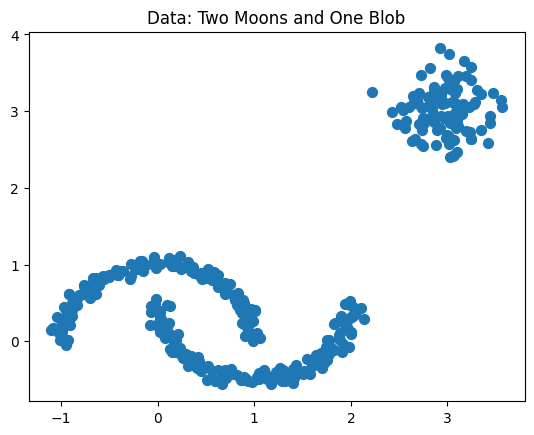

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
#csa026
# Generate two moons dataset
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Generate a blob dataset (to introduce a different density)
X_blob, _ = make_blobs(n_samples=100, centers=[(3, 3)], cluster_std=0.3, random_state=42)

# Combine the datasets (moons + blob)
X = np.vstack([X_moons, X_blob])

# Plot the combined data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Data: Two Moons and One Blob")
plt.show()


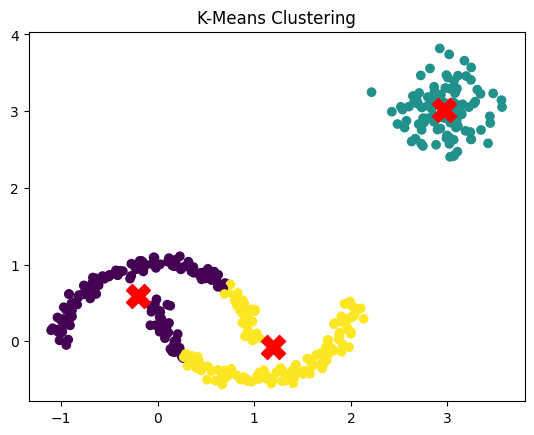

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot the K-Means results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


K-Means assigns parts of the two moon shapes into the same cluster, failing to correctly identify the non-convex shapes. It also tends to form circular boundaries, which don’t align with the complex shape of the moons.

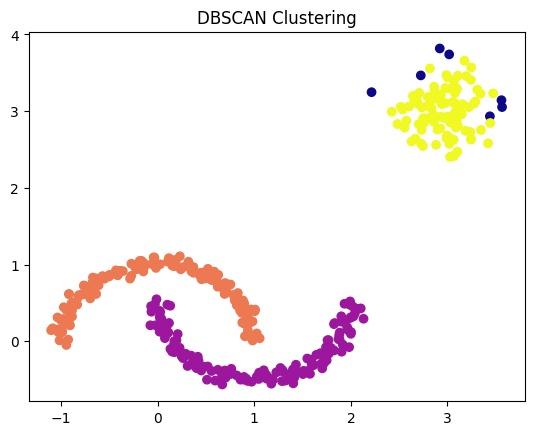

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Plot the DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


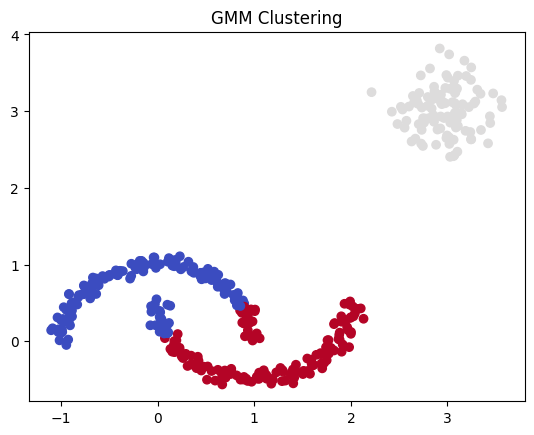

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# Plot the GMM results
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("GMM Clustering")
plt.show()


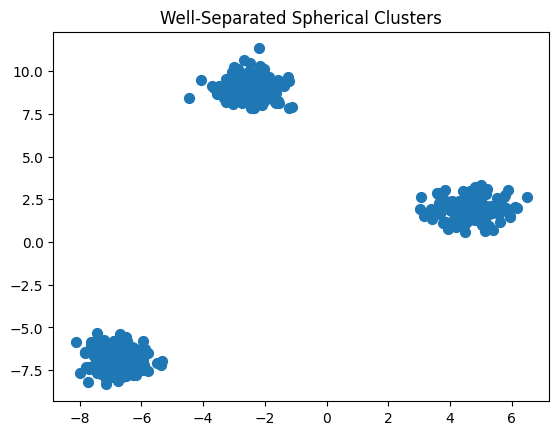

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate well-separated spherical clusters
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Well-Separated Spherical Clusters")
plt.show()


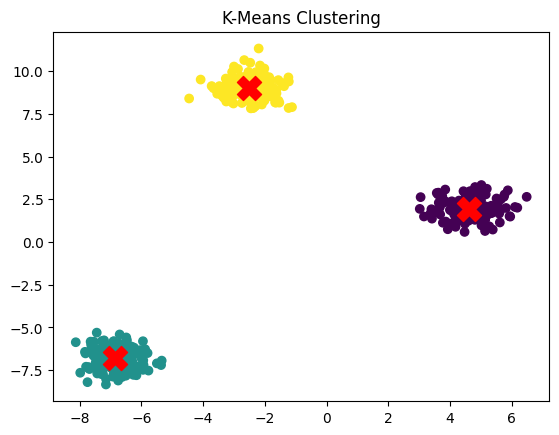

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot K-Means results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


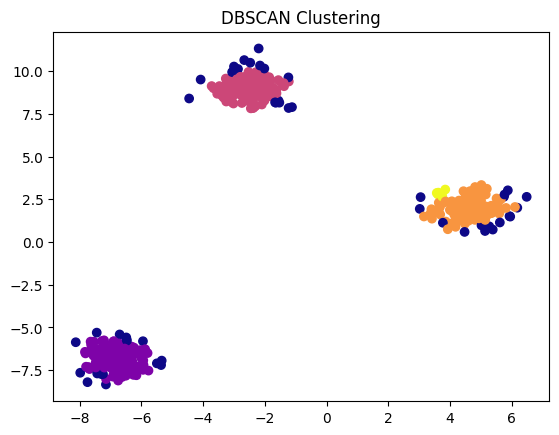

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


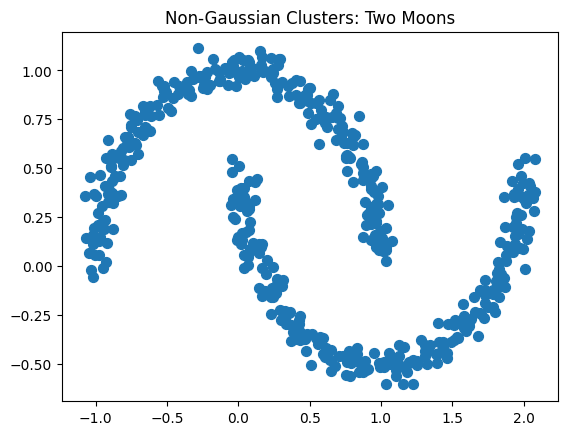

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate non-Gaussian, crescent-shaped clusters (two moons)
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Non-Gaussian Clusters: Two Moons")
plt.show()


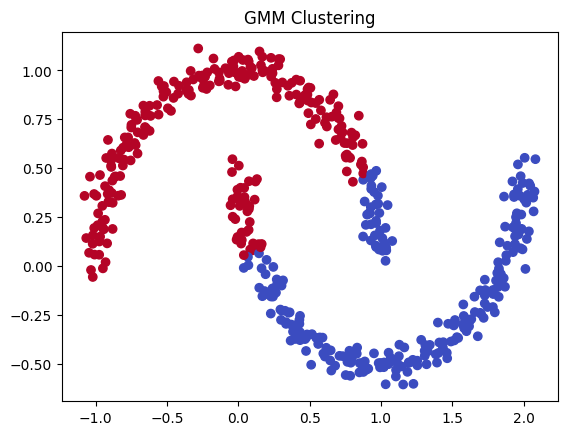

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# Plot GMM results
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("GMM Clustering")
plt.show()


##Why GMM Fails Here:
Gaussian Distribution Assumption:

* GMM assumes that the data points within each cluster are distributed according to a Gaussian (normal) distribution. This works well for spherical or elliptical clusters.
* However, the dataset in your image seems to have a non-elliptical, curved structure (like moons). The GMM algorithm cannot handle this well because it tries to fit ellipses around the data points, which doesn't match the true shape of the clusters.

Linear Boundaries:

* GMM tries to fit clusters with soft, elliptical boundaries, but the data in this case would require more complex, curved boundaries that GMM isn't designed to model.
* The sharp, nonlinear boundary needed to separate the two clusters in this dataset is not captured well by GMM.
No Flexibility in Shape:

GMM can model clusters with varying sizes and orientations, but it assumes they are Gaussian in nature, meaning symmetric and elliptical. The data here requires modeling clusters that are more flexible in shape.

##Better Alternatives for This Data:
DBSCAN:

DBSCAN (Density-Based Spatial Clustering) would be better suited for this kind of dataset since it can capture arbitrary-shaped clusters (like spirals or crescent moons). DBSCAN doesn't assume clusters to be spherical or elliptical and works based on the density of points.


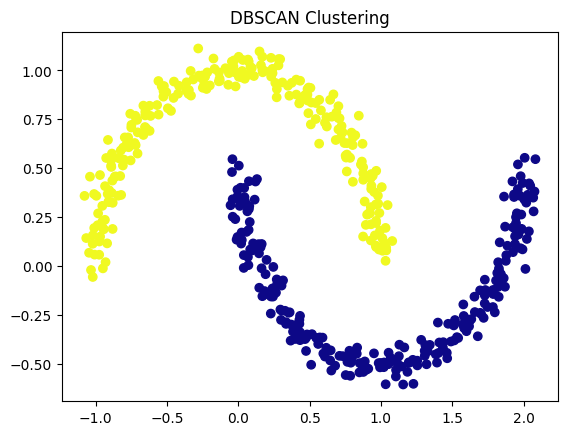

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


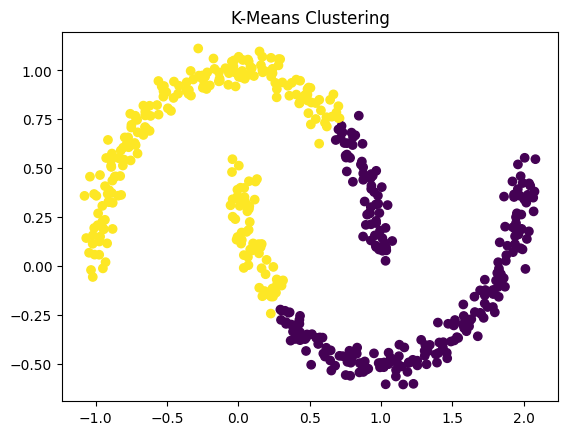

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Plot K-Means results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()


#Assignment: Customer Segmentation using Clustering Techniques

Objective:
In this assignment, you will perform customer segmentation using unsupervised learning techniques. The goal is to group customers from a grocery store's dataset into clusters based on their behaviors and demographics. You will explore various steps, including data cleaning, feature engineering, dimensionality reduction, clustering. The end goal is to develop actionable insights to inform marketing strategies.



Dataset:
* Dataset Name: Customer Personality Analysis
* Source: Kaggle
* Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

* Part 1: Importing Libraries and Loading Data
* Part 2: Data Cleaning and Feature Engineering
* Part 3: Exploratory Data Analysis (EDA)
* Part 4: Data Preprocessing
* Part 5 :Dimensionality Reduction using PCA
* Part 6 Clustering
* Part 7 : Results and your interpretations
* Please Note : Use of libraries is allowed.


Deliverables : Jupyter Notebook